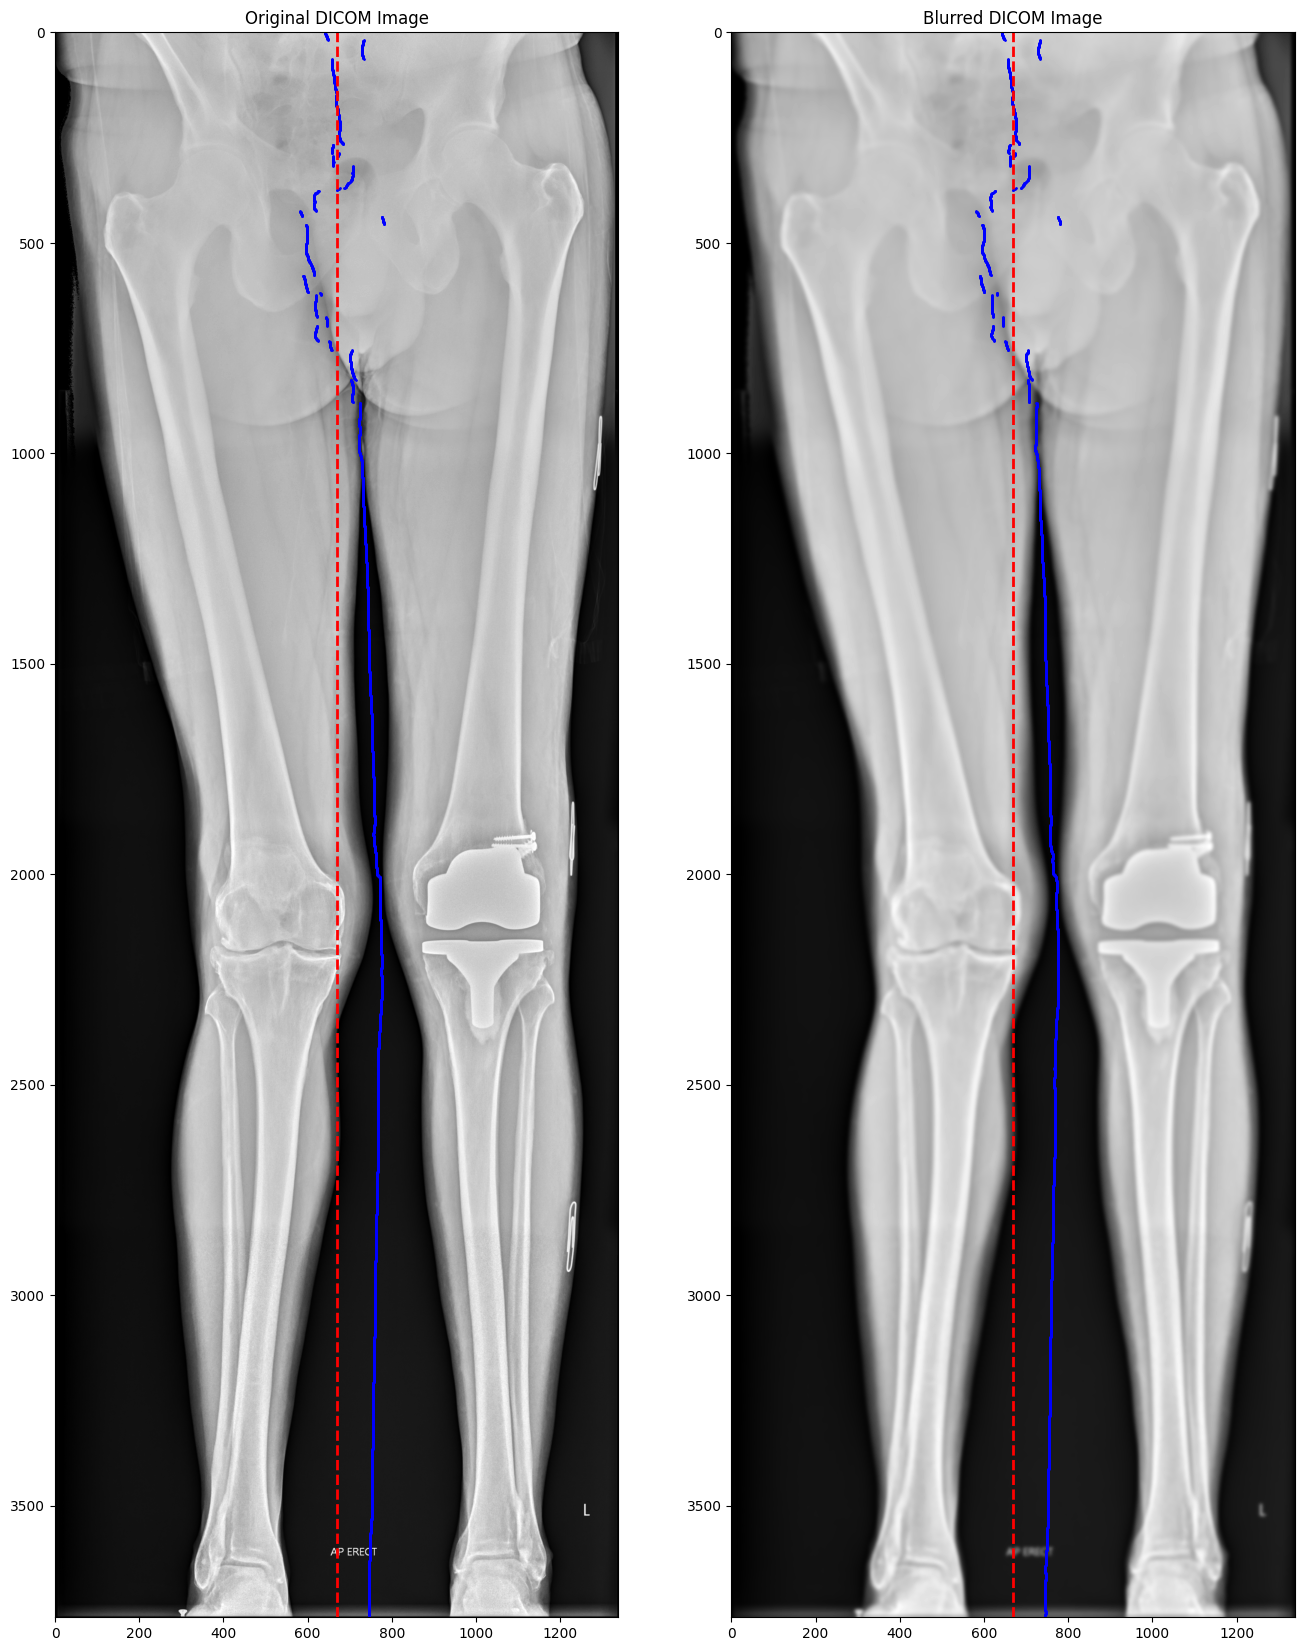

In [33]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import cv2

dicom_file_path = 'IM-0006-0005.dcm'

# Read the DICOM file
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract pixel data
pixel_data = dicom_data.pixel_array.astype(float)
# Apply Gaussian blur, this was added later as it helps reduce noisiness in the symmetry line
blur_radius = 25  # You can adjust the blur radius as needed
blurred_image = cv2.GaussianBlur(pixel_data, (blur_radius, blur_radius), 0)

# Get dimensions of the array
rows, cols = pixel_data.shape

size = int(cols/3) #(half) size of symmetry inspection window

# Initialize the array 'r'
r = np.array([])

for row in range(rows):
    c = np.array([])
    for column in range(size,cols-size):
        i1 = blurred_image[row,column+1-size:column+1] #take an array left of a given column
        i2 = (blurred_image[row,column+1:column+1+size]) #take an array of same size on the right of a given column 
        i2 = i2[::-1] #flip second array (as we are testing for symmetry)
        
        #then, calculate sum of squares of difference of two arrays of size "size". 
        #Where best symmetry exists, the arrays either side of the relevant column should have the lowest error.
        c = np.append(c,np.sum((i1-i2)*(i1-i2)))
    r = np.append(r,np.argmin(c)+size)  # Append the result to the 'r' array, i.e., the column index with best symmetry for a given row
    if (pixel_data[row,int(r[row])]>2*pixel_data[row-1,int(r[row-1])] and row>0):
        r[row]=r[row-1]
    #this if statement forces the symmetry line to progressively seek a darker region of the image (as we have to find line between the legs)
       
# Display the original and mirrored images for comparison
plt.figure(figsize=(16, 30))
plt.subplot(1, 2, 1)
plt.imshow(pixel_data, cmap=plt.cm.gray)
plt.title("Original DICOM Image")
plt.scatter(r,np.arange(len(r)), marker='o', color='blue', label='Data points', s=1)
plt.axvline(x=cols/2, color='red', linestyle='--', linewidth=2, label='Vertical midline')


plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap=plt.cm.gray)
plt.title("Blurred DICOM Image")
plt.scatter(r,np.arange(len(r)), marker='o', color='blue', label='Data points', s=1)
plt.axvline(x=cols/2, color='red', linestyle='--', linewidth=2, label='Vertical midline')



